# Project 1 CAVA
_Theodor Moroianu - 334_ 

In [16]:
ocr.X2.shape

[autoreload of src.ocr failed: Traceback (most recent call last):
  File "/home/theodor/Software/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/theodor/Software/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/theodor/Software/anaconda3/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/theodor/Software/anaconda3/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/theodor/Projects/ThirdYearCourses/Vision/Tema1/src/ocr.py", line 42, in <module>
    X = np.concatenate(X1, X2)
  File "<__array_

NameError: name 'ocr' is not defined

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload


import src.solver as solver
import src.constants as constants

constants.DEBUG = False

solver.generate_train_data()

Training model...
Epoch 1/20
 257/1132 [=====>........................] - ETA: 4s - loss: 1.1732 - accuracy: 0.6179

KeyboardInterrupt: 

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import src.square_extractor as sq
import src.constants as constants
import src.process_sudoku as ps
# import src.jigsaw_checks as js
import src.unit_square_extractor as usq
import src.ocr as ocr
import src.union_find as uf

CLASSIC_IMAGE_PATH = "antrenare/clasic/"
JIGSAW_IMAGE_PATH = "antrenare/jigsaw/"

NUM_CLASSIC = 20
NUM_JIGSAW = 40

def name(i):
    return f"{i // 10}{i % 10}.jpg"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


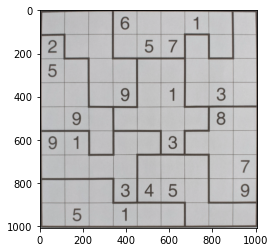

In [10]:
constants.DEBUG_DIGITS = True

im = cv.imread(JIGSAW_IMAGE_PATH + name(3))
square = sq.extract_square_from_image(im)

plt.imshow(square)
plt.show()

In [13]:
constants.DEBUG = False
constants.DEBUG_DIGITS = True
ps.process_jigsaw(im)

([[0, 0, 0, 6, 0, 0, 1, 0, 0],
  [2, 0, 0, 0, 5, 7, 0, 0, 0],
  [5, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 9, 0, 1, 0, 3, 0],
  [0, 9, 0, 0, 0, 0, 0, 8, 0],
  [9, 1, 0, 0, 0, 3, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 7],
  [0, 0, 0, 3, 4, 5, 0, 0, 9],
  [0, 5, 0, 1, 0, 0, 0, 0, 0]],
 [[1, 1, 1, 2, 2, 2, 2, 2, 3],
  [4, 1, 1, 2, 2, 2, 3, 2, 3],
  [4, 4, 1, 1, 5, 5, 3, 3, 3],
  [4, 4, 1, 1, 5, 5, 3, 3, 3],
  [4, 4, 4, 5, 5, 5, 5, 6, 6],
  [7, 7, 4, 7, 7, 5, 6, 6, 6],
  [7, 7, 7, 7, 8, 8, 8, 6, 6],
  [9, 9, 9, 7, 8, 8, 8, 6, 6],
  [9, 9, 9, 9, 9, 9, 8, 8, 8]])

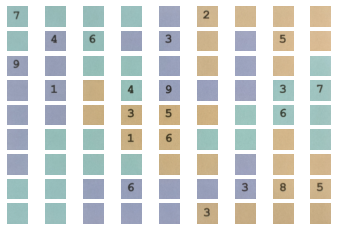

In [4]:
small_sq = usq.extract_unit_squares(square)


In [8]:
ocr.recognize_digit(small_sq[1][0])

0

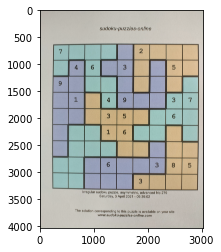

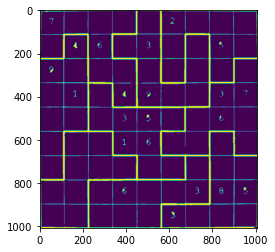

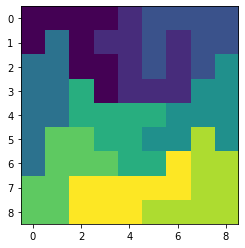

[[0 0 0 0 1 2 2 2 2]
 [0 3 0 1 1 2 1 2 2]
 [3 3 0 0 1 2 1 2 4]
 [3 3 5 0 1 1 1 4 4]
 [3 3 5 5 5 5 4 4 4]
 [3 6 6 5 5 4 4 7 4]
 [3 6 6 6 5 5 8 7 7]
 [6 6 8 8 8 8 8 7 7]
 [6 6 8 8 8 7 7 7 7]]


In [10]:
constants.DEBUG = False

im = cv.imread(JIGSAW_IMAGE_PATH + name(2))
plt.imshow(im)
plt.show()


square = sq.extract_square_from_image(im)
l = usq.adjancy_by_edge_strength(square)

unionfind = uf.UnionFind()

for (x1, y1), (x2, y2) in l:
    id1 = unionfind.to_id(x1, y1)
    id2 = unionfind.to_id(x2, y2)

    unionfind.join(id1, id2)

rez = unionfind.compute_classes()
plt.imshow(rez)
plt.show()
print(np.array(rez))



In [ ]:
import src.ocr as ocr

rez = ocr.recognize_digit(sq[1][1])
print(rez)

In [ ]:
def f(x):
    return np.sin(x)

space = np.linspace(-10, 10, 1000)
f_space = f(space)

points = np.array([-10, 10, -3, 3.4, 5, 6, 9.2])
f_points = f(points)

plt.plot(space, f_space)
plt.stem(points, f_points)
plt.show()




In [ ]:
im.shape

In [ ]:
np.mean(im, axis=(0, 1))

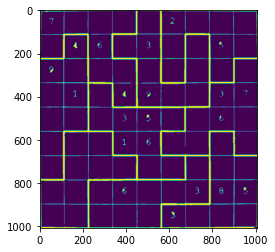

<Figure size 720x720 with 0 Axes>

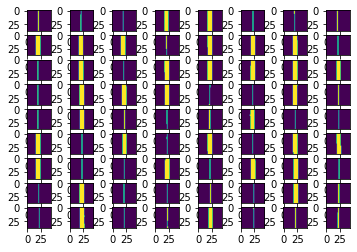

<Figure size 720x720 with 0 Axes>

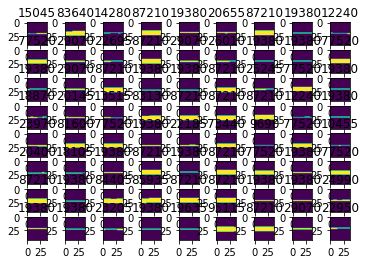

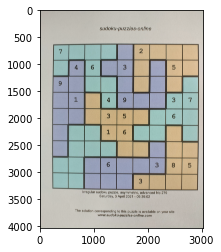

In [11]:
square = sq.extract_square_from_image(im)
oriz, vert = usq.extract_edges(square)

x, y = 10, 10

plt.figure(figsize=(x,y)) 
fig, axis = plt.subplots(nrows=9, ncols=8)
for i in range(9):
    for j in range(8):
        axis[i][j].imshow(oriz[i][j])

plt.show()

plt.figure(figsize=(x,y)) 
fig, axis = plt.subplots(nrows=8, ncols=9)
for i in range(8):
    for j in range(9):
        axis[i][j].set_title(vert[i][j].sum())
        axis[i][j].imshow(vert[i][j])

plt.show()

plt.imshow(im)
plt.show()


In [ ]:
# constants.show_image("sq", sq[0][8])
# ocr.recognize_digit(sq[0][3])
import pytesseract as ts

# cv.imwrite("idk.png",)

image = cv.cvtColor(sq[2][0], cv.COLOR_BGR2GRAY)
_, image = cv.threshold(image, 150, 255, cv.THRESH_BINARY)

plt.imshow(image)

ts.image_to_string(image, config="--psm 10")

In [ ]:
constants.DEBUG = False

def name(i):
    return f"{i // 10}{i % 10}.jpg"

for i in range(1, 41):
    if i <= NUM_CLASSIC:
        img = cv.imread(CLASSIC_IMAGE_PATH + name(i))
        square = sq_extractor.extract_square_from_image(img)
        cv.imwrite(f"Classic #{i}.jpg", square)
    if i <= NUM_JIGSAW:
        img = cv.imread(JIGSAW_IMAGE_PATH + name(i))
        square = sq_extractor.extract_square_from_image(img)
        cv.imwrite(f"Jigsaw #{i}.jpg", square)
    
aa